In [82]:
# Enter your code here, printing relevant answers to console:
import pandas as pd  #Importing pandas library
# Enter your code here, printing relevant answers to console:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
tweetsDf = pd.read_csv("data/tweets_full.csv", sep = ";") 
tweetsDf = tweetsDf.set_index('id')

In [9]:
tweetsDf

,created_at,full_text
id,,
1,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...
2,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...
3,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...
4,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...
5,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...
...,...,...
938668,2020-07-16 00:00:25+00:00,RT @MadMraket: We tend to spend lot of time in...
938669,2020-07-16 00:00:23+00:00,You \n\n$SPX $SPY #ES_F
938670,2020-07-16 00:00:23+00:00,"$KO Coca-Cola #Options #maxpain Chart, Open In..."


In [10]:
tweetsDf['created_at']=pd.to_datetime(tweetsDf['created_at'])


In [11]:
tweetsDf.describe()

C:\Users\ilaks\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,created_at,full_text
count,923673,923673
unique,829053,677585
top,2020-06-29 02:00:04+00:00,"RT @ChrisDungeon: ""Innovation has nothing to d..."
freq,22,1677
first,2020-04-09 00:00:01+00:00,NaN
last,2020-07-16 23:59:13+00:00,NaN


In [41]:
amazonTweets=pd.DataFrame()
microsoftTweets=pd.DataFrame()
appleTweets=pd.DataFrame()
teslaTweets=pd.DataFrame()
amdTweets=pd.DataFrame()

for index,row in tweetsDf.iterrows():
    tempRow=row
    if any(x in row['full_text'].lower() for x in ['amazon','amzn']):
        tempRow['company']='AMZN' 
        amazonTweets=amazonTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['microsoft','msft']):
        tempRow['company']='MSFT'
        microsoftTweets=microsoftTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['apple','aapl']):
        tempRow['company']='AAPL'
        appleTweets=appleTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['tesla','tsla']):
        tempRow['company']='TSLA'
        teslaTweets=teslaTweets.append(tempRow)
    if any(x in row['full_text'].lower() for x in ['advanced micro devices','amd']):
        tempRow['company']='AMD'
        amdTweets=amdTweets.append(tempRow)
        
    

In [49]:
frames = [amazonTweets, microsoftTweets, appleTweets,teslaTweets,amdTweets]
filteredTweets = pd.concat(frames)

In [85]:
filteredTweets

,company,created_at,full_text,PolarityScores,PositiveScore,NegativeScore,NeutralScore,CompoundScore,SentimentClass
19,AMZN,2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.927,0.2023,positive
33,AMZN,2020-04-09 23:54:47+00:00,This week's Expired Signals are now published ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
139,AMZN,2020-04-09 23:36:09+00:00,Dow gains 285 points to cap epic rally $AAPL $...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.146,0.000,0.854,0.3400,positive
156,AMZN,2020-04-09 23:33:41+00:00,Valorant breaks $AMZN's Twitch single-day view...,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",0.000,0.118,0.882,-0.5574,negative
271,AMZN,2020-04-09 23:14:09+00:00,Bill Gates says US government cant wave a wand...,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.079,0.000,0.921,0.3612,positive
...,...,...,...,...,...,...,...,...,...
938618,AMD,2020-07-16 00:05:54+00:00,"Trading Summary - July 15, 2020\n\n7 Trades - ...","{'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...",0.071,0.052,0.878,0.2500,positive
938630,AMD,2020-07-16 00:04:48+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938631,AMD,2020-07-16 00:04:42+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938633,AMD,2020-07-16 00:04:31+00:00,"About an hour left before the ""Mid-week chart ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral


In [86]:
filteredTweets.to_csv('data/filteredComp.csv',sep='|')

## Sentiment Analysis using VADAR
Vadar is short for Valence Aware dictionary and sEntiment reasoner. Vadar identified as lexicon and rule based sentiment analysis tool used to analyze the sentiment of a text. Lexicon is a list of lexical feaures (words) which are labeled with positive or negtive based on semantic meaning.The focus on this notebook not determine if a sentence is objective or subjective, fact or opinion but only focusing on wether the text express positive or negative.

In [57]:
vader_analyzer = SentimentIntensityAnalyzer()
def getPolarityScores(text):
    stats=vader_analyzer.polarity_scores(text)
    return stats

In [59]:
filteredTweets['PolarityScores']=filteredTweets['full_text'].apply(getPolarityScores)

In [62]:
def getSentimentClass(stats):
    if stats['compound'] >= 0.05 : 
        return 'positive'
  
    elif stats['compound'] <= - 0.05 : 
        return 'negative'
        
    else : 
        return 'neutral'  

In [63]:
filteredTweets['PolarityScores']

19        {'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...
33        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
139       {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...
156       {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...
271       {'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...
                                ...                        
938618    {'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...
938630    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
938631    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
938633    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
938662    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: PolarityScores, Length: 378454, dtype: object

In [64]:
filteredTweets['PositiveScore']=filteredTweets['PolarityScores'].apply(lambda x:x['pos'])
filteredTweets['NegativeScore']=filteredTweets['PolarityScores'].apply(lambda x:x['neg'])
filteredTweets['NeutralScore']=filteredTweets['PolarityScores'].apply(lambda x:x['neu'])
filteredTweets['CompoundScore']=filteredTweets['PolarityScores'].apply(lambda x:x['compound'])
filteredTweets['SentimentClass']=filteredTweets['PolarityScores'].apply(getSentimentClass)

In [65]:
filteredTweets

,company,created_at,full_text,PolarityScores,PositiveScore,NegativeScore,NeutralScore,CompoundScore,SentimentClass
19,AMZN,2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.927,0.2023,positive
33,AMZN,2020-04-09 23:54:47+00:00,This week's Expired Signals are now published ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
139,AMZN,2020-04-09 23:36:09+00:00,Dow gains 285 points to cap epic rally $AAPL $...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.146,0.000,0.854,0.3400,positive
156,AMZN,2020-04-09 23:33:41+00:00,Valorant breaks $AMZN's Twitch single-day view...,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",0.000,0.118,0.882,-0.5574,negative
271,AMZN,2020-04-09 23:14:09+00:00,Bill Gates says US government cant wave a wand...,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.079,0.000,0.921,0.3612,positive
...,...,...,...,...,...,...,...,...,...
938618,AMD,2020-07-16 00:05:54+00:00,"Trading Summary - July 15, 2020\n\n7 Trades - ...","{'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...",0.071,0.052,0.878,0.2500,positive
938630,AMD,2020-07-16 00:04:48+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938631,AMD,2020-07-16 00:04:42+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral
938633,AMD,2020-07-16 00:04:31+00:00,"About an hour left before the ""Mid-week chart ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral


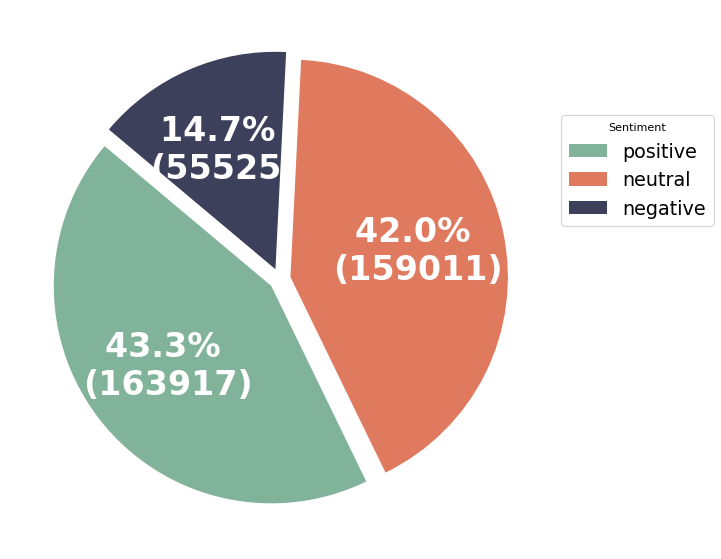

In [68]:
y = filteredTweets['SentimentClass'].value_counts()
mylabels = y.index

fig, ax = plt.subplots(figsize=(24, 9), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% \n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(y, 
                                  autopct=lambda pct: func(pct, y),
                                  textprops=dict(color="w"), 
                                  colors=['#81b29a', '#e07a5f', '#3d405b'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, mylabels, title="Sentiment", loc="center left",fontsize= 'xx-large' ,bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=30, weight=700)
#ax.set_title("Number of News by Sentiment", fontsize=18, fontweight="bold")
plt.show()

In [73]:
df_sentiment = filteredTweets.pivot_table(index='company',columns='SentimentClass',aggfunc='size')

In [92]:
df_sentiment

SentimentClass,negative,neutral,positive
company,,,
AAPL,19827,54225,52311
AMD,1904,8437,8950
AMZN,16701,43081,50396
MSFT,8423,28632,24731
TSLA,8670,24637,27529


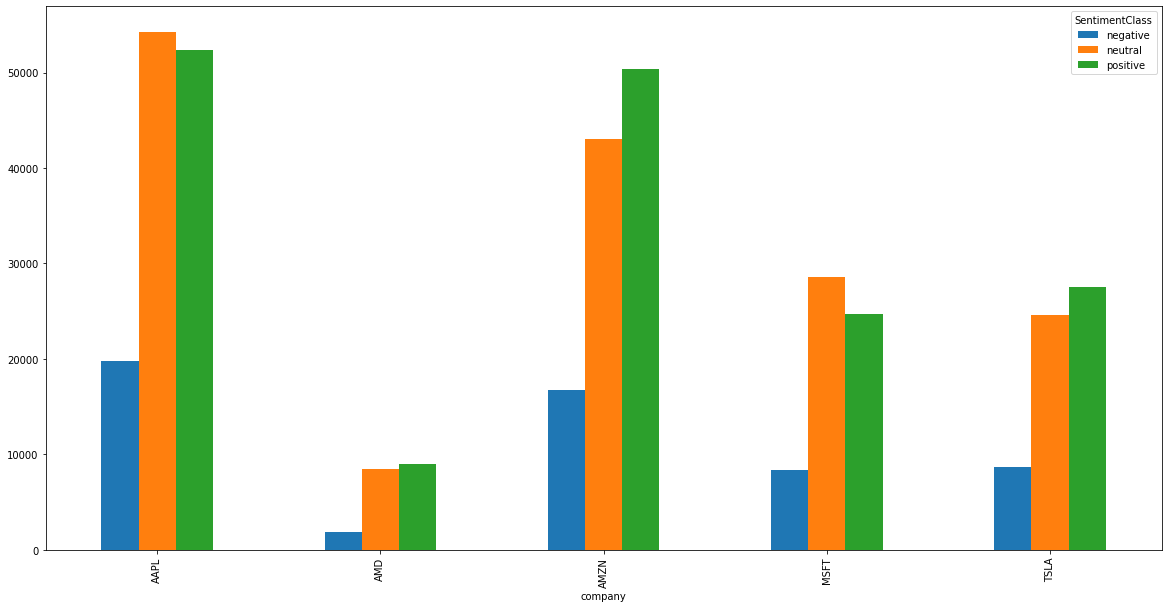

In [79]:
df_sentiment.plot(kind = 'bar',figsize=(20, 10))
plt.show()

In [80]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk_stopwords = nltk.corpus.stopwords.words('english')


#Initializing TweetTokenizer
tk=TweetTokenizer()


#Converting the dataframe to a list
tweetlist = pd.Series.tolist(filteredTweets['full_text'])

#lowecasing the tweets
lowertweetlist=[tweet.lower() for tweet in tweetlist ]

allTokens=[]

import re

def alpha_filter(w):
    # pattern to match a word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

# tokenizing the lowertweets and storing tokens into the flat list allTokens
for tweet in lowertweetlist:
    tweetTokens = tk.tokenize(tweet)
    tweetTokens = [tok for tok in tweetTokens if not tok in nltk_stopwords]
    tweetTokens = [tok for tok in tweetTokens if not alpha_filter(tok)]
    allTokens.extend(tweetTokens)

In [83]:
from nltk import FreqDist
ndist = FreqDist(allTokens)
feqWords = ndist.most_common(50)
feqWords

[('aapl', 241757),
 ('amzn', 221919),
 ('tsla', 153512),
 ('msft', 151198),
 ('rt', 129096),
 ('fb', 115939),
 ('spy', 115052),
 ('nflx', 84963),
 ('qqq', 74796),
 ('ba', 64743),
 ('amd', 61735),
 ('googl', 58244),
 ('nvda', 49419),
 ('spx', 46162),
 ('goog', 44939),
 ('#stocks', 33423),
 ('twtr', 32818),
 ('baba', 30512),
 ('roku', 29958),
 ('btc', 28916),
 ('shop', 27333),
 ('today', 26884),
 ('zm', 26881),
 ('market', 25820),
 ('apple', 25522),
 ('dis', 23254),
 ('#stockmarket', 23235),
 ('jpm', 23079),
 ('stocks', 23020),
 ('iwm', 22953),
 ('stock', 22245),
 ('#investing', 21890),
 ('ge', 21635),
 ('bac', 21191),
 ('week', 21071),
 ('aal', 20901),
 ('amazon', 20306),
 ('#trading', 19668),
 ('bynd', 18751),
 ('day', 18323),
 ('f', 18178),
 ('intc', 17656),
 ('gld', 17548),
 ('eth', 16934),
 ('buy', 16831),
 ('big', 16332),
 ('c', 15914),
 ('wmt', 15699),
 ('like', 15577),
 ('trading', 15574)]

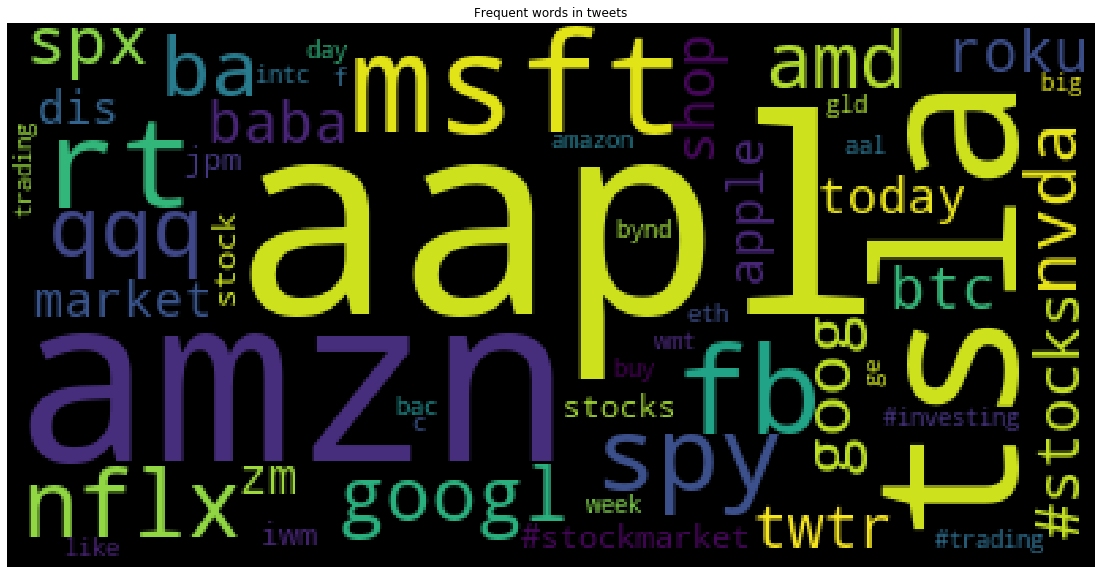

In [84]:
wordcloud = WordCloud().generate_from_frequencies(dict(feqWords))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("Frequent words in tweets")
plt.axis('off')
plt.show()  

amazon , amzn
microsoft, msft
apple, aapl
tesla, tsla
advanced micro devices, amd

In [87]:
filteredTweets['date']=filteredTweets['created_at'].dt.date

In [89]:
filteredTweets

,company,created_at,full_text,PolarityScores,PositiveScore,NegativeScore,NeutralScore,CompoundScore,SentimentClass,date
19,AMZN,2020-04-09 23:55:42+00:00,Treasury Secretary Mnuchin says US could be op...,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.927,0.2023,positive,2020-04-09
33,AMZN,2020-04-09 23:54:47+00:00,This week's Expired Signals are now published ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-04-09
139,AMZN,2020-04-09 23:36:09+00:00,Dow gains 285 points to cap epic rally $AAPL $...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.146,0.000,0.854,0.3400,positive,2020-04-09
156,AMZN,2020-04-09 23:33:41+00:00,Valorant breaks $AMZN's Twitch single-day view...,"{'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'comp...",0.000,0.118,0.882,-0.5574,negative,2020-04-09
271,AMZN,2020-04-09 23:14:09+00:00,Bill Gates says US government cant wave a wand...,"{'neg': 0.0, 'neu': 0.921, 'pos': 0.079, 'comp...",0.079,0.000,0.921,0.3612,positive,2020-04-09
...,...,...,...,...,...,...,...,...,...,...
938618,AMD,2020-07-16 00:05:54+00:00,"Trading Summary - July 15, 2020\n\n7 Trades - ...","{'neg': 0.052, 'neu': 0.878, 'pos': 0.071, 'co...",0.071,0.052,0.878,0.2500,positive,2020-07-16
938630,AMD,2020-07-16 00:04:48+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-07-16
938631,AMD,2020-07-16 00:04:42+00:00,RT @WarlusTrades: $SPX SPY #ES_F #AMD\n\n⚠️ Co...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-07-16
938633,AMD,2020-07-16 00:04:31+00:00,"About an hour left before the ""Mid-week chart ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,2020-07-16


In [135]:
SentimentCompond=pd.DataFrame({'CompoundScore' : filteredTweets.groupby([ 'date','company'])['CompoundScore'].mean()}).reset_index()

In [136]:
SentimentCompond

,date,company,CompoundScore
0,2020-04-09,AAPL,0.131894
1,2020-04-09,AMD,0.184509
2,2020-04-09,AMZN,0.164886
3,2020-04-09,MSFT,0.114465
4,2020-04-09,TSLA,0.114775
...,...,...,...
380,2020-07-16,AAPL,0.141100
381,2020-07-16,AMD,0.217304
382,2020-07-16,AMZN,0.153481
383,2020-07-16,MSFT,0.159503


In [137]:
SentimentCompond = SentimentCompond.pivot(index='date', columns='company', values='CompoundScore')

In [138]:
SentimentCompond

company,AAPL,AMD,AMZN,MSFT,TSLA
date,,,,,
2020-04-09,0.131894,0.184509,0.164886,0.114465,0.114775
2020-04-10,0.159804,0.167707,0.189141,0.100198,0.115593
2020-04-11,0.039595,0.161654,0.012753,0.177521,0.152895
2020-04-12,0.078092,0.159828,0.068979,0.161077,0.191805
2020-04-13,0.149258,0.259793,0.153679,0.078948,0.177561
...,...,...,...,...,...
2020-07-12,0.186293,0.194087,0.148767,0.126246,0.147246
2020-07-13,0.153752,0.258105,0.137691,0.143531,0.166206
2020-07-14,0.154269,0.180890,0.163582,0.125609,0.144266


In [139]:
start_date=SentimentCompond.index[0]
end_date=SentimentCompond.index[-1]
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
print(all_weekdays)

DatetimeIndex(['2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-15',
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
      

In [140]:
SentimentCompond = SentimentCompond.reindex(all_weekdays)
SentimentCompond = SentimentCompond.fillna(method='ffill')

In [141]:
SentimentCompond

company,AAPL,AMD,AMZN,MSFT,TSLA
2020-04-09,0.131894,0.184509,0.164886,0.114465,0.114775
2020-04-10,0.159804,0.167707,0.189141,0.100198,0.115593
2020-04-13,0.149258,0.259793,0.153679,0.078948,0.177561
2020-04-14,0.200569,0.195394,0.133326,0.163726,0.255776
2020-04-15,0.191912,0.167479,0.146791,0.188192,0.186257
...,...,...,...,...,...
2020-07-10,0.188773,0.290578,0.172387,0.152848,0.197578
2020-07-13,0.153752,0.258105,0.137691,0.143531,0.166206
2020-07-14,0.154269,0.180890,0.163582,0.125609,0.144266
2020-07-15,0.176212,0.223387,0.163820,0.117075,0.151629


In [142]:
msftSent = SentimentCompond.loc[:, 'MSFT']
amznSent = SentimentCompond.loc[:, 'AMZN']
tslaSent = SentimentCompond.loc[:, 'TSLA']
aaplSent = SentimentCompond.loc[:, 'AAPL']
amdSent = SentimentCompond.loc[:, 'AMD']

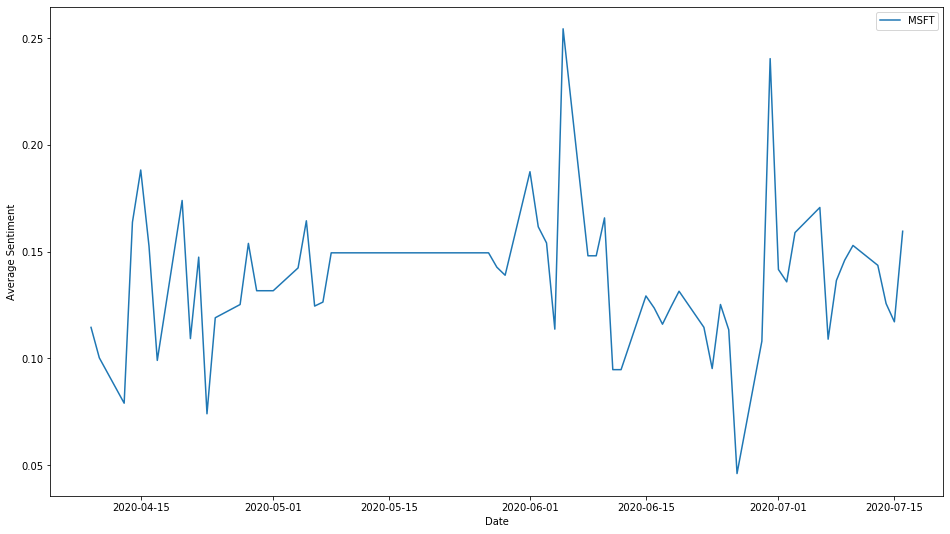

In [143]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(msftSent.index,msftSent, label='MSFT')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

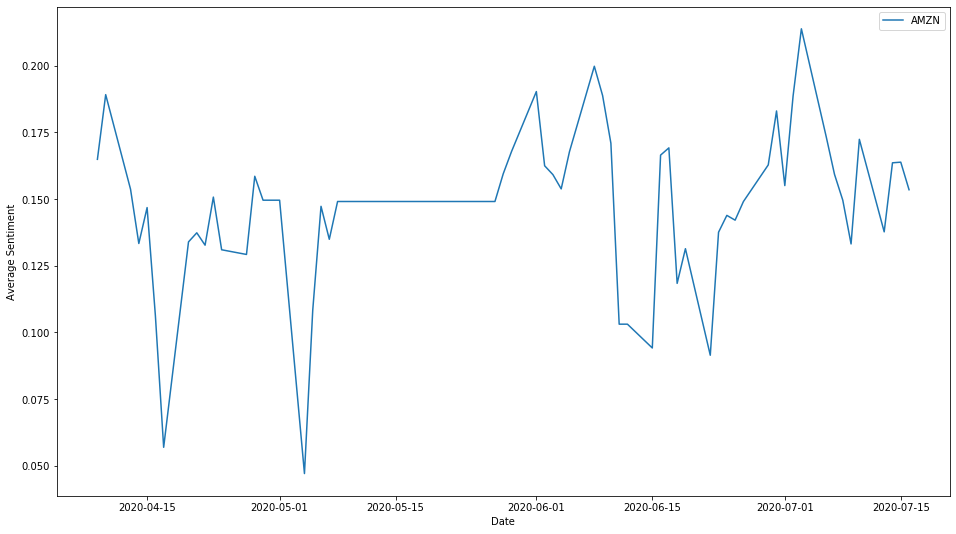

In [144]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amznSent.index,amznSent, label='AMZN')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

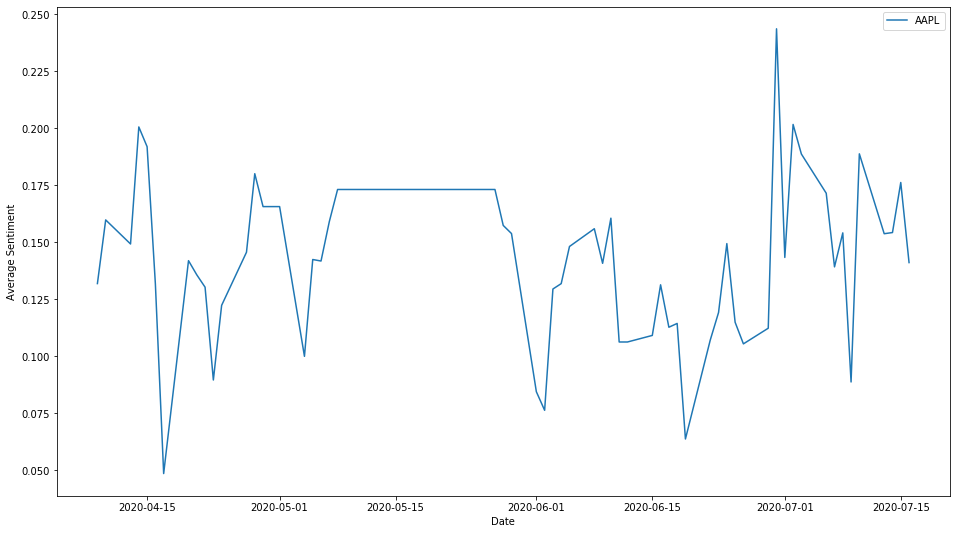

In [145]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(aaplSent.index,aaplSent, label='AAPL')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

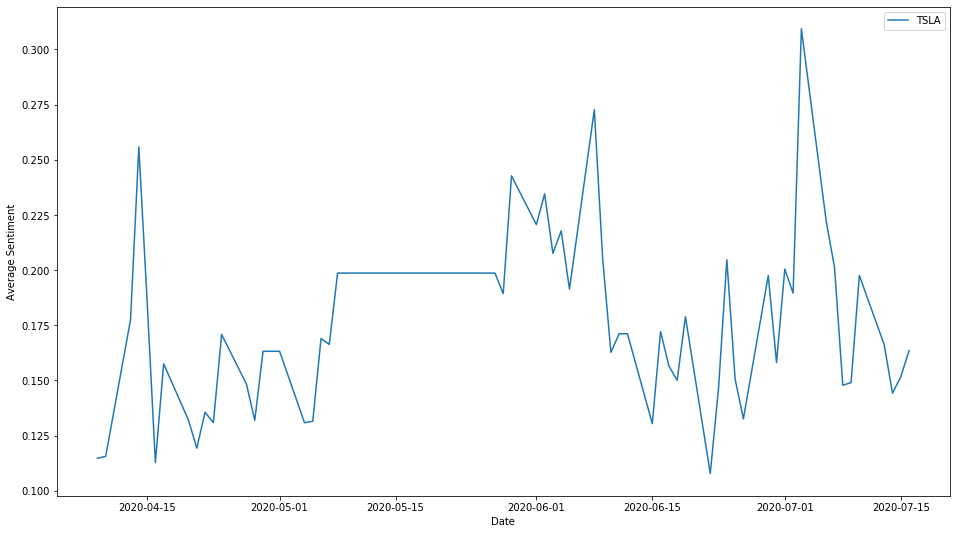

In [146]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(tslaSent.index,tslaSent, label='TSLA')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()

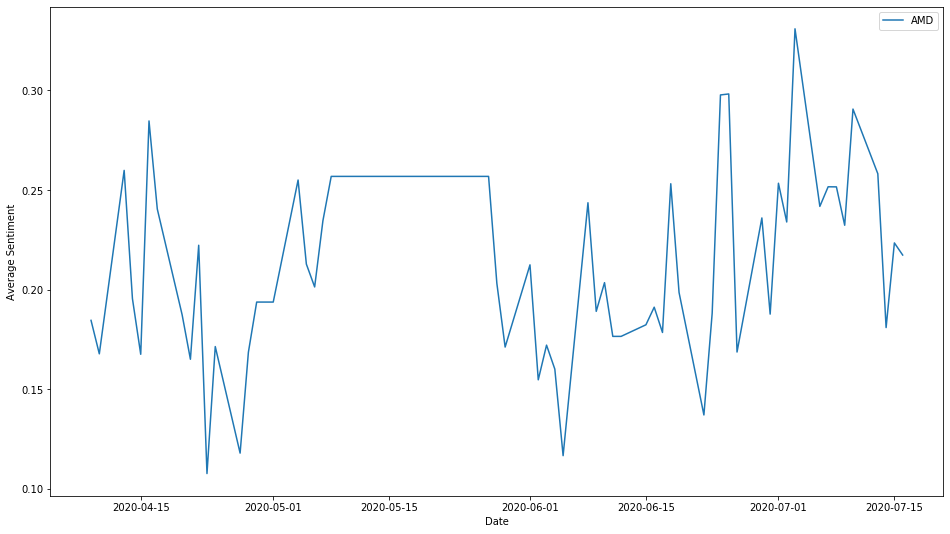

In [147]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(amdSent.index,amdSent, label='AMD')
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment')
ax.legend()